<a href="https://colab.research.google.com/github/andreizouk/Astrophysics/blob/main/Sound_signal_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html

In [1]:
import numpy as np

from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

Generate a test signal, a 2 Vrms sine wave whose frequency is slowly modulated around 3kHz, corrupted by white noise of exponentially decreasing magnitude sampled at 10 kHz.

In [2]:
fs = 10e3
N = 100000
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power),
                   size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

In [3]:
time.shape

(100000,)

In [4]:
x.shape

(100000,)

Text(0.5, 0, 'Time (seconds)')

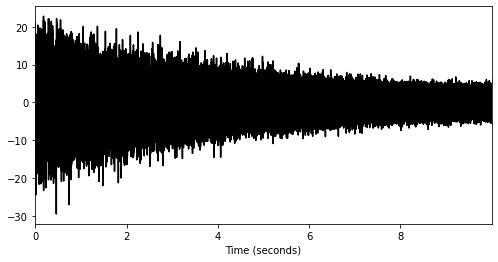

In [9]:
#visualisation of the sound (sound to time, frequency to power)

plt.figure(figsize=(18, 4))
plt.subplot(1, 2, 1)
plt.plot(time, x, c='k')
plt.xlim([min(time), max(time)])
plt.xlabel('Time (seconds)')



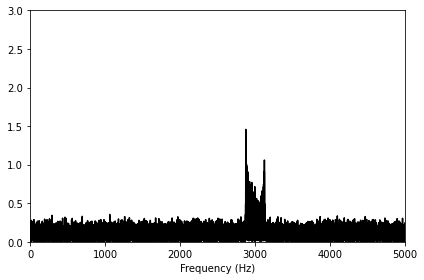

In [13]:

X = np.abs(np.fft.fft(x)) / fs
freq = np.fft.fftfreq(N, d=1/fs)
X = X[:N//2]
freq = freq[:N//2]
plt.plot(freq, X, c='k')
plt.xlim([0, 5000])
plt.ylim([0, 3])
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

Compute and plot the STFT’s magnitude.

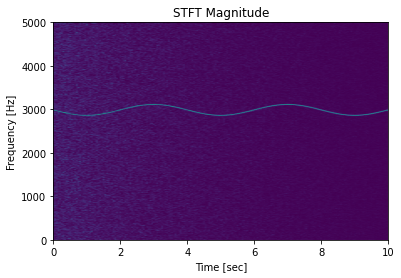

In [12]:
#spectrogram (Time to Frequency)
f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [14]:
#https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_STFT-Basic.html

import os
import numpy as np
import matplotlib
from  matplotlib import pyplot as plt
import librosa
from ipywidgets import interact, fixed, FloatSlider
import IPython.display as ipd
%matplotlib inline

Fs = 128
duration = 20
omega1 = 1
omega2 = 5
N = int(duration * Fs)
t = np.arange(N) / Fs
t1 = t[:N//2]
t2 = t[N//2:]

x1 = 1.0 * np.sin(2 * np.pi * omega1 * t1)
x2 = 0.7 * np.sin(2 * np.pi * omega2 * t2)
x = np.concatenate((x1, x2))


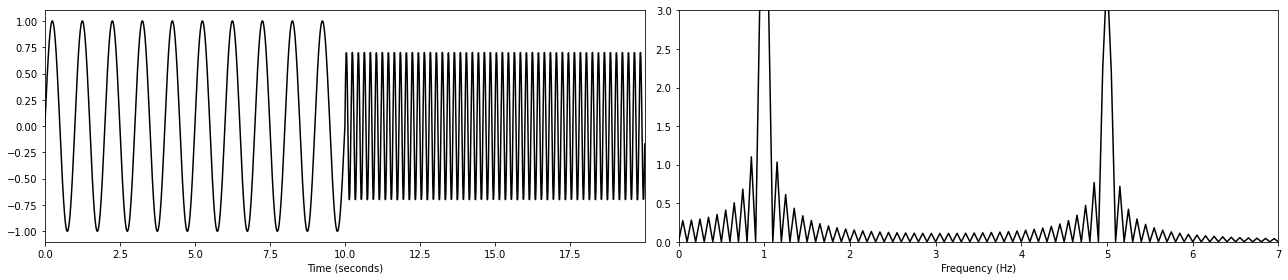

In [15]:
# sound visualisation
plt.figure(figsize=(18, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x, c='k')
plt.xlim([min(t), max(t)])
plt.xlabel('Time (seconds)')

plt.subplot(1, 2, 2)
X = np.abs(np.fft.fft(x)) / Fs
freq = np.fft.fftfreq(N, d=1/Fs)
X = X[:N//2]
freq = freq[:N//2]
plt.plot(freq, X, c='k')
plt.xlim([0, 7])
plt.ylim([0, 3])
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

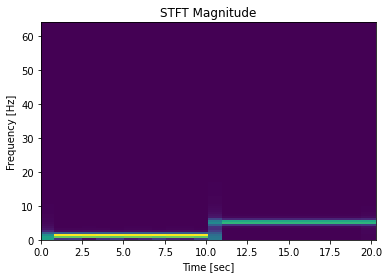

In [16]:
#short time fourier transform (Time to Frequency)
f, t, Zxx = signal.stft(x, Fs, nperseg=216)
plt.pcolormesh(t, f, np.abs(Zxx))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [17]:
t.shape

(25,)

In [18]:
f.shape

(109,)

In [19]:
np.abs(Zxx)

array([[2.67994644e-01, 7.05793943e-02, 7.84236211e-02, ...,
        3.40904880e-04, 5.25203057e-03, 2.12796845e-02],
       [2.69977747e-01, 3.62051640e-01, 3.59454207e-01, ...,
        3.75138161e-04, 5.25668624e-03, 2.12797118e-02],
       [2.34507288e-01, 4.70390941e-01, 4.71312063e-01, ...,
        4.93076122e-04, 5.32937477e-03, 2.23564524e-02],
       ...,
       [1.13766085e-04, 2.12840657e-08, 2.06563036e-08, ...,
        7.84675403e-08, 8.05575974e-05, 3.19483931e-04],
       [1.13680439e-04, 1.79075583e-08, 1.90479438e-08, ...,
        7.79621926e-08, 8.05147323e-05, 3.19267830e-04],
       [1.13669741e-04, 1.66334112e-08, 1.84820562e-08, ...,
        7.77934575e-08, 8.05001085e-05, 3.19265667e-04]])

In [20]:
#https://proglib.io/p/preobrazovaniya-fure-dlya-obrabotki-signalov-s-pomoshchyu-python-2020-11-03№

Audio signal 

In [21]:
import librosa
import os

file_path = ""

In [22]:
%pwd

'/content'

In [23]:
os.getcwd()

'/content'

https://musicinformationretrieval.com/stft.html

In [24]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
os.chdir('/content/drive/MyDrive/music/DJ/violin/')

In [27]:
os.getcwd()

'/content/drive/MyDrive/music/DJ/violin'

In [29]:
#https://librosa.org/doc/latest/generated/librosa.stft.html

y, sr = librosa.load('/content/drive/MyDrive/music/DJ/violin/The Violin Sisters — Minuet In G.mp3')
S = np.abs(librosa.stft(y))
S

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


array([[1.47985727e-01, 2.16347240e-02, 4.77423444e-02, ...,
        1.09568695e-02, 1.33020431e-03, 1.36163493e-03],
       [4.17230241e-02, 1.65122226e-01, 1.90535337e-01, ...,
        1.08781494e-02, 5.17106568e-03, 1.46765809e-03],
       [1.42048866e-01, 4.53874975e-01, 7.31192827e-01, ...,
        7.69142434e-03, 7.64412945e-03, 1.69310870e-03],
       ...,
       [3.54886396e-08, 1.98746353e-08, 1.55954716e-08, ...,
        2.46441045e-09, 1.79159121e-09, 8.03355382e-10],
       [2.24861978e-08, 1.57438573e-09, 1.59359406e-08, ...,
        1.85546112e-09, 1.06801989e-09, 5.81014514e-10],
       [1.27678845e-08, 2.19076650e-08, 7.99057764e-10, ...,
        7.23785920e-10, 1.05062725e-09, 4.12091333e-10]], dtype=float32)

In [32]:
from IPython.display import Audio


Audio(data=y, rate=sr)

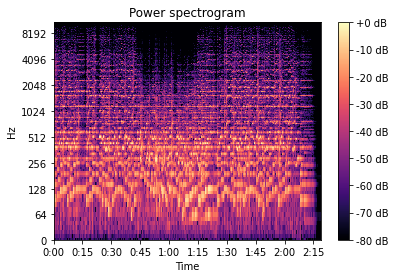

In [31]:
import matplotlib.pyplot as plt
import librosa.display

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),  y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")